In [186]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
def print_score(eval_metric, args):
    print(f"{eval_metric.__name__}: {round(eval_metric(*args), 2)}")

In [188]:
from src.Evaluation.DISCO.disco import disco_samples, only_noise_samples
from src.utils.metrics import METRICS
import numpy as np

# METRICS["DISCO"].__name__ = "disco_score"
# METRICS["DBCV"].__name__ = "dbcv_score"
# METRICS["DBCV_eucl"].__name__ = "dbcv_score_eucl"
# METRICS["DCSI"].__name__ = "dcsi_score"
METRICS["DISCO_non_noise"] = lambda X, l: np.mean(disco_samples(X, l)[l!=-1])
METRICS["DISCO_noise"] = lambda X, l: np.mean(disco_samples(X, l)[l==-1])
METRICS["DISCO_core_prop"] = lambda X, l: np.mean(only_noise_samples(X, l)[0])
METRICS["DISCO_dc_prop"] = lambda X, l: np.mean(only_noise_samples(X, l)[1])

for name in METRICS.keys():
    METRICS[name].__name__ = name

METRICS.keys()

dict_keys(['DISCO', 'DBCV', 'DBCV_eucl', 'DCSI', 'LCCV', 'VIASCKDE', 'CVDD', 'CDBW', 'CVNN', 'SILHOUETTE', 'S_DBW', 'DISCO_non_noise', 'DISCO_noise', 'DISCO_core_prop', 'DISCO_dc_prop'])

In [294]:
from datasets.density_datasets import Datasets as DensityDatasets
import numpy as np
import matplotlib.pyplot as plt

X, l1 = DensityDatasets.dartboard1.standardized_data_cached

In [190]:
X.shape  # noise: 200 / 1000 data points
[len(l1[l1==i]) for i in set(l1)]

[250, 250, 250, 250]

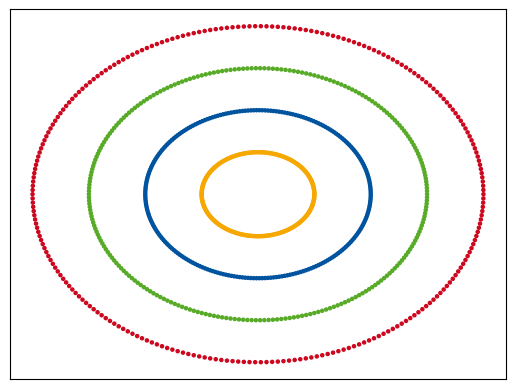

In [191]:
import matplotlib.colors as mcolors
from src.utils.rwth_colors import rwth_colors

cmap = mcolors.ListedColormap([rwth_colors['purple'], rwth_colors['red'], rwth_colors['green'], rwth_colors['blue'], rwth_colors['orange']])
plt.scatter(X[:, 0], X[:, 1], s=5, c=l1, vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.savefig("imgs/motivation/dartboard1.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [192]:
for eval_metric in METRICS.values():
    print_score(eval_metric, [X, l1])

DISCO: 0.87
DBCV: 0.95
DBCV_eucl: 0.45
DCSI: 1.0
LCCV: 0.68
VIASCKDE: 0.48
CVDD: 44912.94
CDBW: 0.0
CVNN: 6.76
SILHOUETTE: -0.04
S_DBW: 1.62
DISCO_non_noise: 0.87
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan


/export/share/pascalw777dm/miniconda3/envs/stuff/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/export/share/pascalw777dm/miniconda3/envs/stuff/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [193]:
from sklearn.cluster import KMeans
np.random.seed(0)
l1_ = KMeans(4).fit_predict(X)

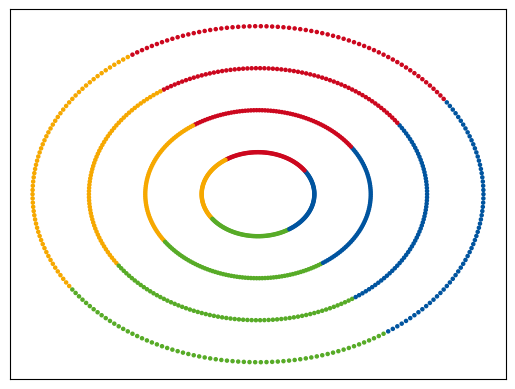

In [194]:
plt.scatter(X[:, 0], X[:, 1], s=5, c=l1_, vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.savefig("imgs/motivation/dartboard_kmeans.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [195]:
for eval_metric in METRICS.values():
    print_score(eval_metric, [X, l1_])

DISCO: -0.01
DBCV: -0.99
DBCV_eucl: -0.7
DCSI: 0.22
LCCV: 0.03
VIASCKDE: 0.37
CVDD: 0.62
CDBW: 0.04
CVNN: 4.17
SILHOUETTE: 0.32
S_DBW: 2.13
DISCO_non_noise: -0.01
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan


/export/share/pascalw777dm/miniconda3/envs/stuff/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/export/share/pascalw777dm/miniconda3/envs/stuff/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [344]:
# from src.utils.data import add_noise

# np.random.seed(0)
# # X_noise, l2 = add_noise(X, l1, 200, 0.2, 0.07)
# R = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
# Z = X / np.column_stack((R, R))
# U = Z * np.column_stack((2*R, 2*R))
# plt.scatter(U[:, 0], U[:, 1], s=5)

array([[ 1.00000000e+00, -2.77555796e-16],
       [ 9.99684192e-01,  2.51299833e-02],
       [ 9.98736923e-01,  5.02449782e-02],
       ...,
       [ 9.97158666e-01, -7.53299101e-02],
       [ 9.98737181e-01, -5.02398654e-02],
       [ 9.99684189e-01, -2.51301089e-02]])

In [369]:
from src.utils.data import add_noise

np.random.seed(0)
X_noise, l2 = add_noise(X, l1, 300, 0.15, 0.07)

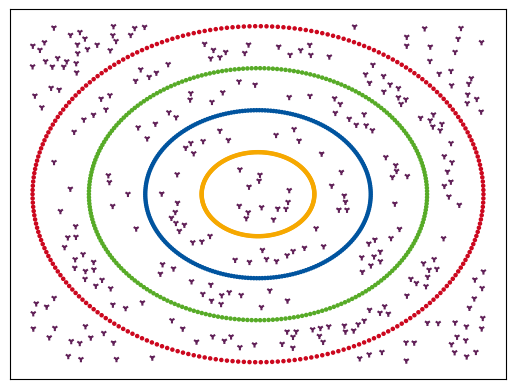

In [370]:
plt.scatter(X_noise[:, 0][l2!=-1], X_noise[:, 1][l2!=-1], s=5, c=l2[l2!=-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap)
plt.scatter(X_noise[:, 0][l2==-1], X_noise[:, 1][l2==-1], s=20, c=l2[l2==-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap, marker="1")
plt.xticks([])
plt.yticks([])
plt.savefig("imgs/motivation/dartboard_noise.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [371]:
for eval_metric in METRICS.values():
    print_score(eval_metric, [X_noise, l2])

DISCO: 0.57
DBCV: 0.73
DBCV_eucl: 0.35
DCSI: 1.0
LCCV: 0.56
VIASCKDE: 0.14
CVDD: 8502.74
CDBW: 0.0
CVNN: 6.72
SILHOUETTE: -0.09
S_DBW: 1.62
DISCO_non_noise: 0.6
DISCO_noise: 0.45
DISCO_core_prop: 0.45
DISCO_dc_prop: 0.47


In [199]:
l2_ = l2.copy()
idx = np.where(X[:, 0] > 0)[0]

l2_[idx] = -1

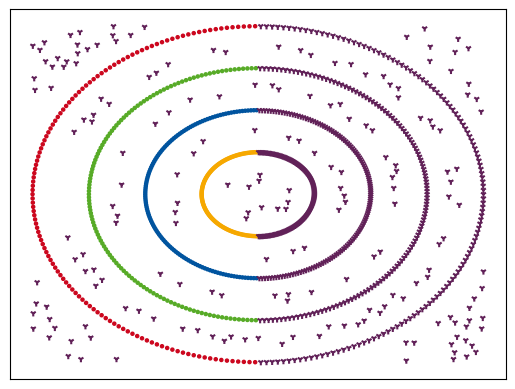

In [200]:
plt.scatter(X_noise[:, 0][l2_!=-1], X_noise[:, 1][l2_!=-1], s=5, c=l2_[l2_!=-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap)
plt.scatter(X_noise[:, 0][l2_==-1], X_noise[:, 1][l2_==-1], s=20, c=l2_[l2_==-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap, marker="1")

plt.xticks([])
plt.yticks([])
# plt.tight_layout()
plt.savefig("imgs/motivation/dartboard_noise_split.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
# plt.savefig("imgs/motivation/dartboard_noise_split.png")
plt.show()

In [201]:
for eval_metric in METRICS.values():
    print_score(eval_metric, [X_noise, l2_])

DISCO: 0.22
DBCV: 0.4
DBCV_eucl: 0.24
DCSI: 1.0
LCCV: 0.36
VIASCKDE: 0.38
CVDD: 800.09
CDBW: 0.01
CVNN: 4.95
SILHOUETTE: -0.03
S_DBW: 1.54
DISCO_non_noise: 0.7
DISCO_noise: -0.12
DISCO_core_prop: -0.12
DISCO_dc_prop: 0.16


In [374]:
import math

P = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
R = [P[(P > i) & (P < (i + 0.3))].mean() for i in [0.5, 1, 1.5, 2]]

np.random.seed(200)

n_noise = 200

circle_ids = np.random.choice(4, size=n_noise, replace=True)
angles = np.random.choice(360, size=n_noise, replace=True).astype(float)
angles *= (2 * math.pi / 360)

p = np.array(
    [[math.sin(angle) * R[id], math.cos(angle) * R[id]] for id, angle in zip(circle_ids, angles)]
)

X_noise2 = X.copy()
X_noise2 = np.vstack((X_noise2, p))

l3 = l1.copy()
l3 = np.hstack((l3, np.array([-1] * n_noise)))

from src.utils.data import add_noise

np.random.seed(0)
X_noise2, l3 = add_noise(X_noise2, l3, 100, 0.1, 0.07)

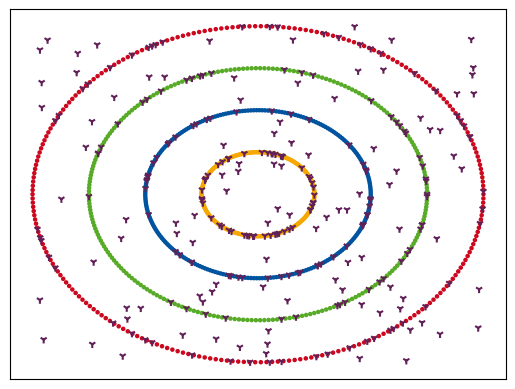

In [375]:
plt.scatter(X_noise2[:, 0][l3!=-1], X_noise2[:, 1][l3!=-1], s=5, c=l3[l3!=-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap)
plt.scatter(X_noise2[:, 0][l3==-1], X_noise2[:, 1][l3==-1], s=30, c=l3[l3==-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap, marker="1")

plt.xticks([])
plt.yticks([])
# plt.tight_layout()
plt.savefig("imgs/motivation/dartboard_noise_split.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
# plt.savefig("imgs/motivation/dartboard_noise_split.png")
plt.show()

In [376]:
for eval_metric in METRICS.values():
    print_score(eval_metric, [X_noise2, l3])

DISCO: 0.49
DBCV: 0.73
DBCV_eucl: 0.35
DCSI: 1.0
LCCV: 0.36
VIASCKDE: -0.15
CVDD: 0.03
CDBW: 0.0
CVNN: 6.7
SILHOUETTE: -0.1
S_DBW: 1.62
DISCO_non_noise: 0.69
DISCO_noise: -0.2
DISCO_core_prop: -0.2
DISCO_dc_prop: 0.03


In [397]:
from sklearn.neighbors import NearestNeighbors

noise = X_noise2[-100:]

nbrs = NearestNeighbors(n_neighbors=1).fit(X)
_, idx = nbrs.kneighbors(noise)
l3_ = l3.copy()
l3_[-100:] = l1[idx].flatten()

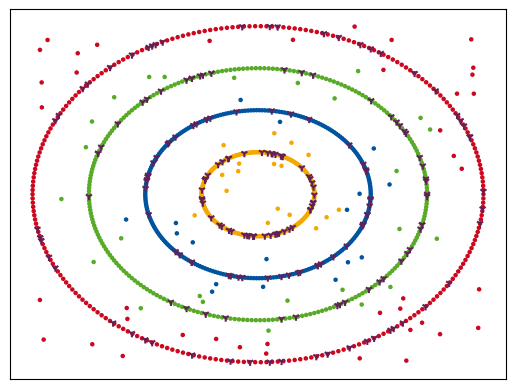

In [398]:
plt.scatter(X_noise2[:, 0][l3_!=-1], X_noise2[:, 1][l3_!=-1], s=5, c=l3_[l3_!=-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap)
plt.scatter(X_noise2[:, 0][l3_==-1], X_noise2[:, 1][l3_==-1], s=30, c=l3_[l3_==-1], vmin=-1, vmax=len(set(l1)) - 1, cmap=cmap, marker="1")

plt.xticks([])
plt.yticks([])
# plt.tight_layout()
plt.savefig("imgs/motivation/dartboard_noise_split.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
# plt.savefig("imgs/motivation/dartboard_noise_split.png")
plt.show()

In [399]:
for eval_metric in METRICS.values():
    print_score(eval_metric, [X_noise2, l3_])

DISCO: 0.35
DBCV: 0.65
DBCV_eucl: 0.35
DCSI: 0.82
LCCV: 0.36
VIASCKDE: 0.01
CVDD: 0.0
CDBW: 0.0
CVNN: 6.77
SILHOUETTE: -0.08
S_DBW: 1.65
DISCO_non_noise: 0.59
DISCO_noise: -0.93
DISCO_core_prop: -0.93
DISCO_dc_prop: -0.85
